<a href="https://colab.research.google.com/github/kaurdilpreet56/TelecomChurnCaseStudy/blob/main/Telecom_churn_case_study_Doubt_resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Churn Prediction System for Customers

## What is churn prediction ?
* let’s take an example, suppose you have taken a premium subscription of the company product now you think that it’s time to leave the subscription, for this you will contact to the company, the company will try to offer some extra functionalities for not leaving the subscription. This is because it will be a loss for any industry that there is some percent of customers are not using their product.

#### For prediction of this kind of situation, there is a data science team is present, that will predict the customer churn based on several features.

## Dataset

* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to   leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank     compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to   leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.

Dataset Link: https://www.kaggle.com/datasets/sanamps/churn-modelling-with-ann

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data="https://raw.githubusercontent.com/deepakmoud/churnmodeling/main/Project7/Churn_Modelling.csv"

In [ ]:
#importing the dataset
dataset = pd.read_csv(data)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Our targate column is 'Exited'
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

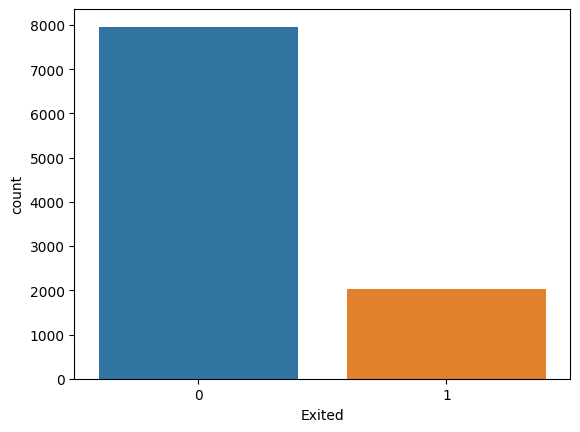

In [ ]:
sns.countplot(x=dataset['Exited'],data=dataset)

<Axes: xlabel='Gender', ylabel='count'>

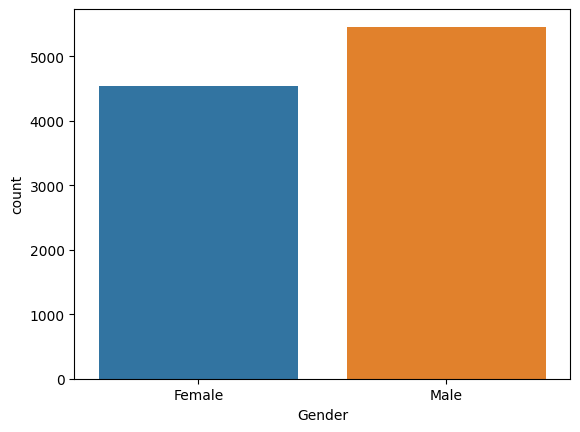

In [ ]:
sns.countplot(x=dataset['Gender'],data=dataset)

<Axes: xlabel='Geography', ylabel='count'>

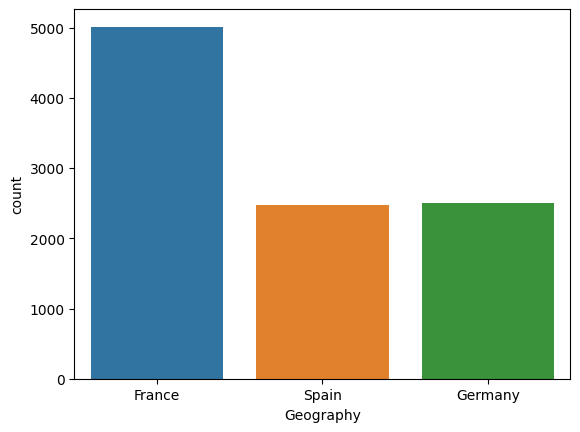

In [ ]:
sns.countplot(x=dataset['Geography'], data=dataset)

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<ipython-input-55-110f2e8c6f54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

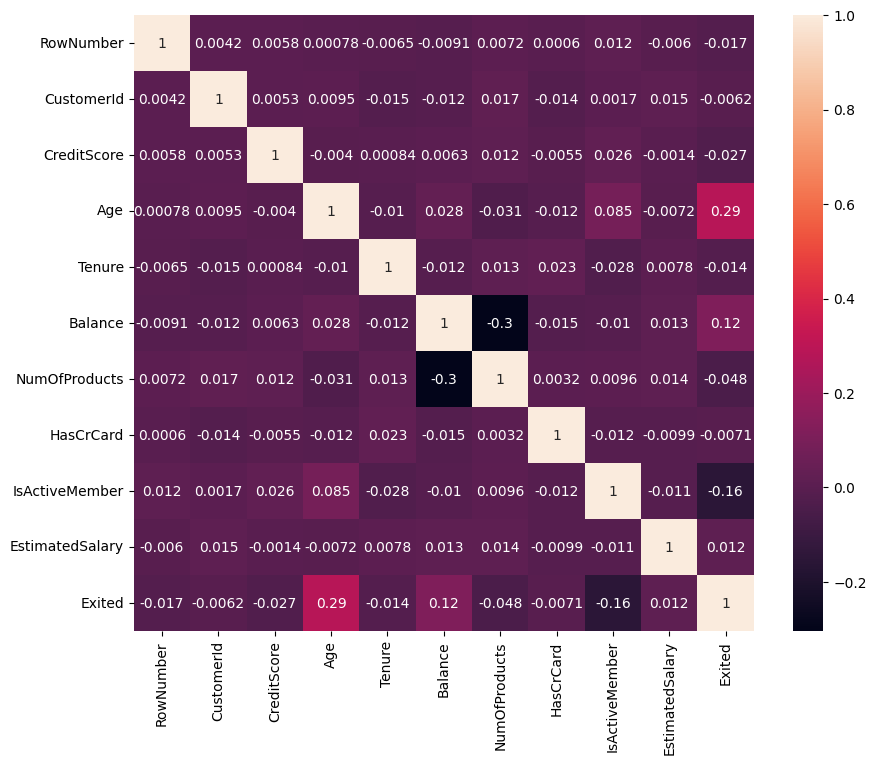

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
#Checking Null Values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, 3:13].values 
# Extracting dependent variable:
y = dataset.iloc[:, 13].values # this is for 1 d array  coming up this will make it 2-d array

In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])


In [ ]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling
# Standard Scaling:  Standardization = X'=X-mean(X)/standard deviation
# normal scaling : Normalization= X'=X-min(X)/max(x)-min(X)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.16958176,  1.51919821, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.89294542,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.3131264 , -1.09168714, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [ ]:
X_test_scaled

array([[-0.55204276,  0.3131264 , -1.09168714, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297, -0.89294542, -1.09168714, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  1.51919821, -1.09168714, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227,  1.51919821,  0.91601335, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991,  0.3131264 ,  0.91601335, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688,  0.3131264 ,  0.91601335, ...,  0.64259497,
        -1.03227043,  1.61255917]])

### **DECISION_TREE**

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier_decision.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Predicting the Test set results
y_pred = classifier_decision.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 78.35


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier_decision,open('/content/drive/My Drive/project7_decision_model.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


**SVM**

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier_svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=0)

In [ ]:
y_pred = classifier_svm.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 86.30


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier_svm,open('/content/drive/My Drive/project7_svm.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


## **RANDOM_FOREST**

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_Random = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier_Random.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [ ]:
y_pred = classifier_Random.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 86.25


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier_Random,open('/content/drive/My Drive/project7_random_forest.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


## **KNN**

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier_knn.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 83.45


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier_knn,open('/content/drive/My Drive/project7_knn.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


### **NAIVE_BAYES**

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test_scaled)

In [ ]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 82.75


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier_knn,open('/content/drive/My Drive/project7_naive.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


## **GUI**

In [ ]:
%mkdir templates -p

In [ ]:
%%writefile templates/index.html
<html>
<head>
<link href="//maxcdn.bootstrapcdn.com/bootstrap/4.1.1/css/bootstrap.min.css" rel="stylesheet" id="bootstrap-css">
<script src="//maxcdn.bootstrapcdn.com/bootstrap/4.1.1/js/bootstrap.min.js"></script>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.6.0/jquery.min.js"></script>
<!-- CSS only -->
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-gH2yIJqKdNHPEq0n4Mqa/HGKIhSkIHeL5AyhkYV8i59U5AR6csBvApHHNl/vI1Bx" crossorigin="anonymous">
<!-- JavaScript Bundle with Popper -->
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/js/bootstrap.bundle.min.js" integrity="sha384-A3rJD856KowSb7dwlZdYEkO39Gagi7vIsF0jrRAoQmDKKtQBHUuLZ9AsSv4jD4Xa" crossorigin="anonymous"></script>
<style>
.register{
    background: -webkit-linear-gradient(left, #3931af, #00c6ff);
    margin-top: 3%;
    padding: 3%;
}
.register-left{
    text-align: center;
    color: #fff;
    margin-top: 4%;
}
.register-left input{
    border: none;
    border-radius: 1.5rem;
    padding: 2%;
    width: 60%;
    background: #f8f9fa;
    font-weight: bold;
    color: #383d41;
    margin-top: 30%;
    margin-bottom: 3%;
    cursor: pointer;
}
.register-right{
    background: #f8f9fa;
    border-top-left-radius: 10% 50%;
    border-bottom-left-radius: 10% 50%;
}
.register-left img{
    margin-top: 15%;
    margin-bottom: 5%;
    width: 25%;
    -webkit-animation: mover 2s infinite  alternate;
    animation: mover 1s infinite  alternate;
}
@-webkit-keyframes mover {
    0% { transform: translateY(0); }
    100% { transform: translateY(-20px); }
}
@keyframes mover {
    0% { transform: translateY(0); }
    100% { transform: translateY(-20px); }
}
.register-left p{
    font-weight: lighter;
    padding: 12%;
    margin-top: -9%;
}
.register .register-form{
    padding: 10%;
    margin-top: 10%;
}
.btnRegister{
    float: right;
    margin-top: 10%;
    border: none;
    border-radius: 1.5rem;
    padding: 2%;
    background: #0062cc;
    color: #fff;
    font-weight: 600;
    width: 50%;
    cursor: pointer;
}
.register .nav-tabs{
    margin-top: 3%;
    border: none;
    background: #0062cc;
    border-radius: 1.5rem;
    width: 28%;
    float: right;
}
.register .nav-tabs .nav-link{
    padding: 2%;
    height: 34px;
    font-weight: 600;
    color: #fff;
    border-top-right-radius: 1.5rem;
    border-bottom-right-radius: 1.5rem;
}
.register .nav-tabs .nav-link:hover{
    border: none;
}
.register .nav-tabs .nav-link.active{
    width: 100px;
    color: #0062cc;
    border: 2px solid #0062cc;
    border-top-left-radius: 1.5rem;
    border-bottom-left-radius: 1.5rem;
}
.register-heading{
    text-align: center;
    margin-top: 8%;
    margin-bottom: -15%;
    color: #495057;
}

</style>
</head>

<body>
<form action="{{ url_for('predict')}}"method="get">
<div class="container register">
                <div class="row">
                    <div class="col-md-3 register-left">
                        <h2>Session on Multiple Linear Regression</h2>
                        <h2>ML Algorithms</h2>
                        <br>
                        <h3>Profit </h3>
                        <h3>Project Deployment</h3>
                        <br>
                        <h4>Developed By Deepak Moud</h4>
                        
                    </div>
                    <div class="col-md-9 register-right">
                        
                        <div class="tab-content" id="myTabContent">
                            <div class="tab-pane fade show active" id="home" role="tabpanel" aria-labelledby="home-tab">
                                <h3 class="register-heading">Prediction Using All Models</h3>
                                <div class="row register-form">
                                    <div class="col-md-6">
                                        <div class="form-group">
                                            <input type="text" class="form-control" placeholder="Credit Score *" name="credit" />
                                        </div>
                                        <div class="form-group">
                                            <select name="geography" class="form-control">
                                                <option class="hidden"  selected disabled>Select Geography</option>
                                                <option value="0">France</option>
                                                <option value="1">Spain</option>
                                                <option value="2">Germany</option>
                                                
                                            </select>
                                        </div>
                                        
                                        <div class="form-group">
                                            <input type="text" class="form-control" placeholder="Age *" name="age" />
                                        </div>
                                        <div class="form-group">
                                            <input type="text" class="form-control"  placeholder="Tenure *" name="tenure" />
                                        </div>
                                        <div class="form-group">
                                            <input type="text" class="form-control" placeholder="Balance *" name="balance" />
                                        </div>
                                        
                                        
                                        
                                    </div>
                                    <div class="col-md-6">
                                        <div class="form-group">
                                            <input type="text" name="num_p" class="form-control" placeholder="Number of Products *" value="" />
                                        </div>
                                        
                                        
                                        
                                        <div class="form-group">
                                            <input type="text" name="salary" class="form-control" placeholder="Estimated Salary *" value="" />
                                        </div>
                                        <div class="form-group">
                                            <div class="maxl">
                                                <label class="radio inline"> Credit Card?
                                                    <input type="radio" name="card" value="1" checked>
                                                    <span> Yes </span> 
                                                </label>
                                                <label class="radio inline"> 
                                                    <input type="radio" name="card" value="0">
                                                    <span>No </span> 
                                                </label>
                                            </div>
                                        </div>
                                        <div class="form-group">
                                            <div class="maxl">
                                                <label class="radio inline"> Active Member? 
                                                    <input type="radio" name="active" value="1" checked>
                                                    <span> Yes </span> 
                                                </label>
                                                <label class="radio inline"> 
                                                    <input type="radio" name="active" value="0">
                                                    <span>No </span> 
                                                </label>
                                            </div>
                                        </div>
                                        <div class="form-group">
                                            <div class="maxl">
                                                <label class="radio inline"> Gender
                                                    <input type="radio" name="gender" value="1" checked>
                                                    <span> Male </span> 
                                                </label>
                                                <label class="radio inline"> 
                                                    <input type="radio" name="gender" value="0">
                                                    <span>Female </span> 
                                                </label>
                                            </div>
                                        </div>
                                        
                                        
                                    </div>
                                    <div class="col-md-12">
                                        <div class="form-group">
                                            <select name="model1" class="form-control">
                                                <option class="hidden"  selected disabled>Select Model</option>
                                                <option value="0">Decision Tree</option>
                                                <option value="1">SVM</option>
                                                <option value="2">Random Forest</option>
                                                <option value="3">KNN</option>
                                                <option value="4">Naive Bayes</option>
                                                
                                            </select>
                                        </div>
                                        </div>
                                        <div class="col-md-6">
                                        <input type="submit" class="btnRegister"  value="Predict"/>
                                        </div>
                                </div><center>{{ prediction_text }}</center>
                               
                            
                                </div>
                            </div> 
                        </div>
                    </div>
              
                    </form>
                    
                    
    </body>
</html>
              

Writing templates/index.html


In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=29bdbc56132ffb84f515e8e83281646ffa00c4301a14852afb666d978f11cf8c
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2Ltrxzr7all8wsh0grVdO7aQTIY_4pGibLxJNd6gHN1TCCP24

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle


app = Flask(__name__)


run_with_ngrok(app)

@app.route('/')
def home():
  
    return render_template("index.html")
  
@app.route('/predict',methods=['GET'])
def predict():
    
    
    '''
    For rendering results on HTML GUI
    '''
    credit = float(request.args.get('credit'))
    geography=float(request.args.get('geography'))
    gender=float(request.args.get('gender'))
    age=float(request.args.get('age'))
    tenure=float(request.args.get('tenure'))
    balance=float(request.args.get('balance'))
    num_p=float(request.args.get('num_p'))
    card=float(request.args.get('card'))
    model1=float(request.args.get('model1'))
    active=float(request.args.get('active'))
    salary=float(request.args.get('salary'))

    if model1==0:
      model=pickle.load(open('/content/drive/My Drive/project7_decision_model.pkl','rb'))
    elif model1==1:
      model=pickle.load(open('/content/drive/My Drive/project7_svm.pkl','rb'))
    elif model1==2:
      model=pickle.load(open('/content/drive/My Drive/project7_random_forest.pkl','rb'))
    elif model1==3:
      model=pickle.load(open('/content/drive/My Drive/project7_knn.pkl','rb'))
    elif model1==4:
      model=pickle.load(open('/content/drive/My Drive/project7_naive.pkl','rb'))
      

    dataset= pd.read_csv('/content/drive/My Drive/Churn_Modelling.csv')
    X = dataset.iloc[:, 3:13].values
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
    X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X = sc.fit_transform(X)
    prediction = model.predict(sc.transform([[credit,geography,gender,age,tenure,balance,num_p,card,active,salary]]))
    if prediction==0:
      message="Not Exited"
    else:
      message="Exited"
    
        
    return render_template('index.html', prediction_text='Model  has predicted : {}'.format(message))


app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://d3ac-34-80-116-207.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [05/May/2023 06:26:03] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/May/2023 06:26:04] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/May/2023 06:26:19] "GET /predict?credit=23&geography=1&age=23&tenure=4&balance=3456&num_p=2&salary=345&card=1&active=1&gender=1&model1=2 HTTP/1.1" 200 -


http://churnmodeling.pythonanywhere.com/

* Null values are not present in our dataset

In [ ]:
#Handling Categorical Variables
df=pd.get_dummies(df,drop_first=True)

In [ ]:
#Dividing the Data into X and y
X=df.drop('Exited',axis=1)
y=df['Exited']

In [ ]:
X.shape

(10000, 11)

In [ ]:
y.shape

(10000,)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train[2]

1

In [ ]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8000, 11)
(8000,)


## Create Artificial Neural Network

* Sequential usually refers to an entire model, not just one layer. 
* Sequential refers to the way you build models in Keras using the sequential api from keras.
* To install keras run the command pip install keras.

In [ ]:
#Importiing libraries
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
keras.__version__

'2.12.0'

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
#Initializing the ANN
ann_clf=Sequential()

In [ ]:
#adding the input layer and first hidden layer
ann_clf.add(Dense(activation='relu',input_dim=11,units=6,kernel_initializer='uniform'))

In [ ]:
##Adding the second hidden layer
ann_clf.add(Dense(activation='relu',units=6,kernel_initializer='uniform'))

In [ ]:
#adding the outputlayer
ann_clf.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

In [ ]:
#compiling the ann
ann_clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Model Summery

In [ ]:
ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [ ]:
##Fiting the ann to the training set
ann_clf.fit(X_train,y_train,validation_split=0.33,batch_size=32,epochs=100)

Epoch 1/100
168/168 [==============================] - 2s 3ms/step - loss: 0.6333 - accuracy: 0.7921 - val_loss: 0.5116 - val_accuracy: 0.7910
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7962 - val_loss: 0.4447 - val_accuracy: 0.7910
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7962 - val_loss: 0.4405 - val_accuracy: 0.7910
Epoch 4/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.7962 - val_loss: 0.4385 - val_accuracy: 0.7910
Epoch 5/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7962 - val_loss: 0.4363 - val_accuracy: 0.7910
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.7962 - val_loss: 0.4321 - val_accuracy: 0.7910
Epoch 7/100
168/168 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8057 - val_loss: 0.4295 - val_accuracy: 0.8201

In [ ]:
# Predicting the Test set results
y_pred = ann_clf.predict(X_test)

63/63 [==============================] - 0s 948us/step


In [ ]:
y_pred

array([[0.12831579],
       [0.05467479],
       [0.28443012],
       ...,
       [0.3833999 ],
       [0.03681032],
       [0.11266263]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[1552,   55],
       [ 268,  125]])

## Accuracy

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8385

http://churnmodeling.pythonanywhere.com/